In [1]:
import requests
import polyline

import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
def osrm_format(coords):
    lat, lon = coords
    return f"{lon},{lat}"

In [3]:
def get_route(points):
    points = ';'.join(map(osrm_format, points))
    params = {
        'geometries': 'polyline6',
    }
    
    response = requests.get(f"http://127.0.0.1:6000/route/v1/foot/{points}", params=params)
    routes = response.json()
    
    if routes['code'] != 'Ok':
        print(routes)
        return None
    
    geometry = routes['routes'][0]['geometry']
    return polyline.decode(geometry, 6)

In [4]:
def plot_gpx(route, ax):
    latitudes = [point[0] for point in route]
    longitudes = [point[1] for point in route]
    ax.plot(longitudes, latitudes, color='red', label='Route')
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

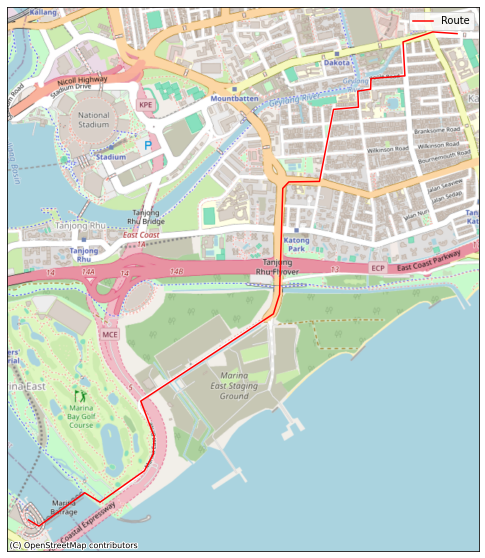

In [14]:
start = (1.309661268561104, 103.89597697793923)
stop = (1.2807204896546946, 103.87051948826861)

points = [start] + [stop]

osrm_route = get_route(points) 
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

plot_gpx(osrm_route, ax)

plt.savefig('../maps/foot_profile_default.png', bbox_inches='tight')